# Improved machine learning

In this analysis, I use support vector regression (SVR)
to model the relationship between house price and the
distance to the nearest MRT station.

We focus on a one-feature regression problem in order
to clearly visualize the model behavior and validation results.

Although preprocessing could be applied, in this analysis
we primarily explore the effect of adjusting the SVR's gamma parameter.
We fit the SVR model to the training data and predict house prices
over a dense range of distances.  
The predicted curve is plotted along with the training and test data points, 
allowing us to visually assess how the gamma setting affects the model's ability to capture the general trend.

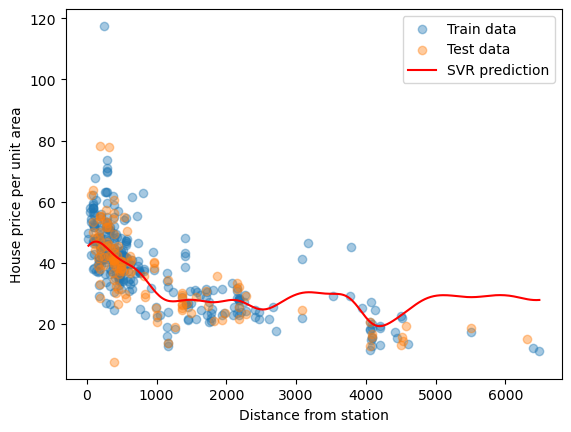

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error

df = pd.read_csv("Real estate valuation data set.csv")

X = df[["X3 distance to the nearest MRT station"]].values
y = df["Y house price of unit area"].values

plt.xlabel("Distance from station")
plt.ylabel("House price per unit area")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

svr = SVR(kernel="rbf", gamma=0.00001)
svr.fit(X_train, y_train)

x_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = svr.predict(x_plot)
plt.scatter(X_train, y_train, alpha=0.4, label="Train data")
plt.scatter(X_test, y_test, alpha=0.4, label="Test data")
plt.plot(x_plot, y_plot, color="red", label="SVR prediction")
plt.legend()
plt.show()

<br>
<br>

___
# Validation

In [2]:
y_pred_train = svr.predict(X_train)
y_pred_test  = svr.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test,  y_pred_test)

print(f"MSE (training) = {mse_train}")
print(f"MSE (test)     = {mse_test}")

MSE (training) = 86.21381850294378
MSE (test)     = 73.68281572886973


We evaluate the prediction accuracy using mean squared error (MSE) on both training and test sets:  
- Training MSE: 86.21  
- Test MSE: 73.68  

The test MSE being lower than the training MSE suggests that the model generalizes reasonably well without strong overfitting.

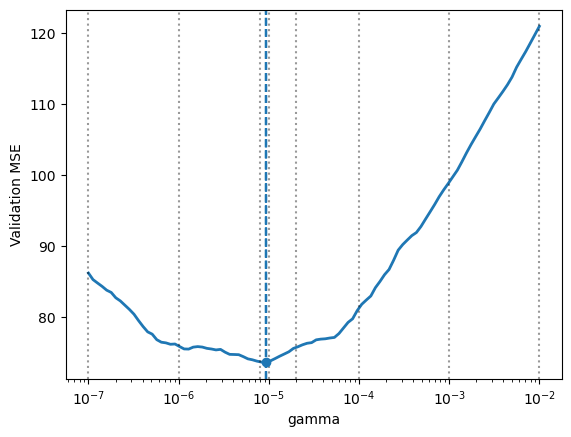

In [3]:
gammas = [0.0000001,0.000001, 0.000008, 0.00001, 0.00002, 0.0001, 0.001, 0.01]

gamma_dense = np.logspace(-7, -2, 100)
mse_dense = []

for g in gamma_dense:
    model = SVR(kernel="rbf", gamma=g)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_dense.append(mean_squared_error(y_test, y_pred))
    best_idx = np.argmin(mse_dense)
    best_gamma = gamma_dense[best_idx]
    best_mse = mse_dense[best_idx]

fig, ax = plt.subplots()

ax.plot(gamma_dense, mse_dense, lw=2)
ax.scatter(best_gamma, best_mse, zorder=5)

for g in gammas:
    ax.axvline(g, linestyle='dotted', color='k', alpha=0.4)
    ax.axvline(best_gamma, linestyle='--', alpha=0.8)

ax.set_xscale("log")
ax.set_xlabel("gamma")
ax.set_ylabel("Validation MSE")
plt.show()

We perform a gamma validation to examine how changing the SVR's gamma parameter affects model performance.  
A dense range of gamma values is evaluated, and vertical dotted lines indicate the specific candidate values tested.

- Very small gamma values fail to capture the general trend (underfitting).  
- Very large gamma values fit the noise too closely (overfitting).  
- Intermediate gamma values provide the best balance and the lowest validation error.

This gamma validation plot visually demonstrates why the selected gamma value is appropriate for the SVR model in this dataset.